# Initialization

In [100]:
!pip install seaborn
!pip install plotly


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [101]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [102]:
df_plot = pd.read_csv("loan.csv", low_memory=False)
df_plot.shape

(39717, 111)

In [103]:
# Method to Combine the information into a single DataFrame

def combinedInfo(df_cleaned):
    # Get the count of null values in each column
    null_counts = df_cleaned.isnull().sum()
    # Get the data types of each column
 
    data_types = df_cleaned.dtypes
    detailed_info = pd.DataFrame({
        'Data Type': data_types,       
        'Non-Null Count': df_cleaned.count(),
        'Null Count': null_counts,
        'Unique Values': df_cleaned.nunique(),
        'Top': df_cleaned.mode().iloc[0],
        'Freq': df_cleaned.apply(lambda x: x.value_counts().iloc[0] if not x.value_counts().empty else np.nan),
    })

    pd.set_option('display.max_rows', None)  # To display all rows
    pd.set_option('display.max_columns', None)  # To display all columns
    pd.set_option('display.max_colwidth', None)  # To display full column width
    pd.set_option('display.expand_frame_repr', False)  # To display wide DataFrames side by side
    
    
    detailed_info = detailed_info.sort_index(axis=0)

    # return the detailed information
    return detailed_info


In [104]:
combinedInfo(df_plot)

,Data Type,Non-Null Count,Null Count,Unique Values,Top,Freq
acc_now_delinq,int64,39717,0,1,0.0,39717.0
acc_open_past_24mths,float64,0,39717,0,NaN,NaN
addr_state,object,39717,0,50,CA,7099.0
all_util,float64,0,39717,0,NaN,NaN
annual_inc,float64,39717,0,5318,60000.0,1505.0
annual_inc_joint,float64,0,39717,0,NaN,NaN
application_type,object,39717,0,1,INDIVIDUAL,39717.0
avg_cur_bal,float64,0,39717,0,NaN,NaN
bc_open_to_buy,float64,0,39717,0,NaN,NaN
bc_util,float64,0,39717,0,NaN,NaN


# Step 1 : Cleaning

In [105]:
# Get the percentage of null values in each column
null_percentage = df_plot.isnull().mean() * 100

# Extract column names with 100% null values
columns_with_nulls = null_percentage[null_percentage >= 75].index.tolist()

columns_with_nulls


['mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percen

In [106]:
# Drop columns with >=75% null values
df = df_plot.drop(columns=columns_with_nulls)

In [107]:
df.shape

(39717, 55)

In [108]:
df_combined = combinedInfo(df)
df_combined

,Data Type,Non-Null Count,Null Count,Unique Values,Top,Freq
acc_now_delinq,int64,39717,0,1,0.0,39717
addr_state,object,39717,0,50,CA,7099
annual_inc,float64,39717,0,5318,60000.0,1505
application_type,object,39717,0,1,INDIVIDUAL,39717
chargeoff_within_12_mths,float64,39661,56,1,0.0,39661
collection_recovery_fee,float64,39717,0,2616,0.0,35935
collections_12_mths_ex_med,float64,39661,56,1,0.0,39661
delinq_2yrs,int64,39717,0,11,0.0,35405
delinq_amnt,int64,39717,0,1,0.0,39717
desc,object,26775,12942,26526,,210


In [109]:
# identifying columns having null values and trying to impute it.
null_columns = df_combined[df_combined["Null Count"] > 0]
null_columns = null_columns.reset_index()
null_columns = null_columns.rename(columns={'index':'column_name'})

column_type_name_map = null_columns.groupby(by="Data Type")["column_name"].apply(list)
column_type_name_map

Data Type
float64    [chargeoff_within_12_mths, collections_12_mths_ex_med, mths_since_last_delinq, pub_rec_bankruptcies, tax_liens]
object                                  [desc, emp_length, emp_title, last_credit_pull_d, last_pymnt_d, revol_util, title]
Name: column_name, dtype: object

## 1. Observations - TODO
### Columns need to be analysed & imputed.
- pub_rec_bankruptcies
- tax_liens
- emp_length
- revol_util

In [110]:
#Getting columns which has only single unique values.
df_combined = combinedInfo(df)
single_valued_columns = df_combined[df_combined["Unique Values"] == 1]
df[single_valued_columns.index].head(2)

,acc_now_delinq,application_type,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_amnt,initial_list_status,policy_code,pymnt_plan,tax_liens
0,0,INDIVIDUAL,0.0,0.0,0,f,1,n,0.0
1,0,INDIVIDUAL,0.0,0.0,0,f,1,n,0.0


## 2. Observation
### Below columns has only single value and thus it will not impact the loan status. We can drop them.
- acc_now_delinq
- application_type
- chargeoff_within_12_mths
- collections_12_mths_ex_med
- delinq_amnt
- initial_list_status
- policy_code
- pymnt_plan
- tax_liens

In [111]:
# #Dropping the single valued columns
df = df.drop(columns=single_valued_columns.index.to_list())
df.shape

(39717, 46)

In [112]:
combinedInfo(df)

,Data Type,Non-Null Count,Null Count,Unique Values,Top,Freq
addr_state,object,39717,0,50,CA,7099
annual_inc,float64,39717,0,5318,60000.0,1505
collection_recovery_fee,float64,39717,0,2616,0.0,35935
delinq_2yrs,int64,39717,0,11,0.0,35405
desc,object,26775,12942,26526,,210
dti,float64,39717,0,2868,0.0,183
earliest_cr_line,object,39717,0,526,Nov-98,370
emp_length,object,38642,1075,11,10+ years,8879
emp_title,object,37258,2459,28820,US Army,134
funded_amnt,int64,39717,0,1041,10000.0,2741


### Based on above column description, below are some of the columns which looks useful and thus are further divided.

| Customers Location    |
|---------|
| Employment Title (title)  | 
| Employment Length (emp_length)    | 
| Zip Code (zip_code)|
| Description  (desc)| 

<br/>

| Loan Characteristics | 
|---------------|
| Loan Amount (loan_amnt) |
| Funded Amount (funded_amnt) |
| Funded Amount Investment  (funded_amnt_inv) |
| Interest Rate (int_rate) | 
| Loan Status (loan_status) |
| Loan Grade (grade) |
| Loan Issue Date (issue_d) |
| Loan Sub Grade (sub_grade) |
| Income Verification (verification_status) |

<br/>

| Behavior Variables | 
|---------------|
| Delinquency Year -2 (delinq_2yrs)  |
| Debt to income (Dti) |
| Earliest Credit Date (earliest_cr_line) |
| Revolving balance (revol_bal)  |
| Loan Purpose (purpose) |
| Term (term) |
| Annual Income (annual_inc) |
| Employeement Length (annual_inc) |
| Home Ownership (home_ownership) |
| Number of Credit Lines(total_acc) |
| Open Credit Lines (open_acc) |
| Derogatory Record (pub_rec) |
| Record of Bankruptcies (pub_rec_bankruptcies) |
| Revolving Credit Balance(revol_bal) |
| Revolving Utilization Rate (revol_util) |
| Loan Title (title) |

<br/>

| Post Loan Sanction | 
|---------------|
| Total Payment Recieved (total_pymnt)  |
| Investor Payment Received (total_pymnt_inv)   |
| Interest Received (total_rec_int)  | 
| Late Fees Received (total_rec_late_fee)|
| Principal Received (total_rec_prncp) |
| Recovery Fee (collection_recovery_fee)|


## Columns to drop
### Inline similar columns
- State & zipcode, are similar, hence we can drop addr_state column.
### Post Loan Sanction columns
- last_pymnt_amnt, out_prncp, out_prncp_inv, total_pymnt_inv recoveries, total_pymnt, total_pymnt_inv, total_rec_int, total_rec_late_fee, total_rec_prncp : Useful post loan approves
### Row Unique columns
- member_id, id, url, last_credit_pull_d, emp_title : fields not useful in analysis as they all have unique values

In [113]:
df = df.drop(columns = ["addr_state","last_pymnt_amnt","out_prncp_inv", "member_id","id", "url", "total_pymnt", "total_pymnt_inv", "total_rec_int", "total_rec_late_fee", "total_rec_prncp", "last_credit_pull_d", "emp_title"])
df.shape

(39717, 33)

### Imputing columns
#### Below columns are having null values, hence we can evaluate whether to drop the null values or impute them.
- emp_length
- title
- revol_util
- pub_rec_bankruptcies
### Below columns are object type, converting it to correct type.
- term : to integer
- int_rate : to float
- loan_status : to category

In [114]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [115]:
def imputeEmpLength(empLength):
    empLength = str(empLength).replace("< 1 year","0").replace("years","").replace("year","").replace("+","").strip()
    return 0 if empLength == "nan" else int(empLength)

df.emp_length = df.emp_length.apply(lambda x: imputeEmpLength(x))

In [116]:
#title value impute
print("Before null impute " + str(len(df[df.title.isnull()].title)))
df.title = df.title.fillna(value=df.title.mode()[0])
print("After null impute " + str(len(df[df.title.isnull()].title)))

Before null impute 11
After null impute 0


In [117]:
#revol_util value impute
print("Before null impute " + str(len(df[df.revol_util.isnull()].revol_util)))
df.revol_util = df.revol_util.fillna(value=df.revol_util.mode()[0])
print("After null impute " + str(len(df[df.revol_util.isnull()].revol_util)))

df.revol_util = df.revol_util.apply(lambda x: round(float(x.replace("%","")),2))
df.revol_util

Before null impute 50
After null impute 0


0        83.70
1         9.40
2        98.50
3        21.00
4        53.90
5        28.30
6        85.60
7        87.50
8        32.60
9        36.50
10       20.60
11       67.10
12       91.70
13       43.10
14       55.50
15       81.50
16       70.20
17       16.00
18       37.73
19       23.10
20       85.60
21       90.30
22       82.40
23       91.80
24       29.70
25       93.90
26       57.60
27       59.50
28       37.70
29       59.10
30       86.90
31       27.40
32       63.60
33       29.30
34       60.50
35       57.20
36       13.30
37       50.40
38       66.50
39       50.00
40       18.10
41       21.00
42       98.10
43       99.00
44       32.50
45       13.40
46       62.10
47       52.30
48       19.50
49       36.40
50       63.70
51       62.00
52       92.90
53       90.80
54       52.10
55       97.60
56       75.10
57       72.70
58       59.10
59       91.20
60       58.90
61       58.90
62       57.40
63       66.90
64       30.10
65       45.90
66       7

In [118]:
print("Before null impute " + str(len(df[df.pub_rec_bankruptcies.isnull()].pub_rec_bankruptcies)))
df.pub_rec_bankruptcies = df.pub_rec_bankruptcies.fillna(value=df.pub_rec_bankruptcies.value_counts()[0])
print("After null impute " + str(len(df[df.pub_rec_bankruptcies.isnull()].revol_util)))

Before null impute 697
After null impute 0


####  Imputing Data

In [119]:
# converting the column
df["term"] = df["term"].apply(lambda x : int(x.replace(" months","")))
df["int_rate"] = df["int_rate"].apply(lambda x : float(x.replace("%","")))


In [120]:
df['home_ownership'].unique()


array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

#### There are only 3 records with 'NONE' value in the data. So replacing the value with 'OTHER'

In [121]:
#replacing 'NONE' with 'OTHERS'
df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

### Imputing issue_d

In [122]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_month']= df['issue_d'].dt.month                     
df['issue_year']= df['issue_d'].dt.year        

# Filtering
### Filtering loan_status with Current, as we are only interested in either Fully paid or Charged off

In [123]:
# removing current loan amount
df = df[df.loan_status != "Current"]
df.shape

(38577, 35)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                38577 non-null  int64         
 1   funded_amnt              38577 non-null  int64         
 2   funded_amnt_inv          38577 non-null  float64       
 3   term                     38577 non-null  int64         
 4   int_rate                 38577 non-null  float64       
 5   installment              38577 non-null  float64       
 6   grade                    38577 non-null  object        
 7   sub_grade                38577 non-null  object        
 8   emp_length               38577 non-null  int64         
 9   home_ownership           38577 non-null  object        
 10  annual_inc               38577 non-null  float64       
 11  verification_status      38577 non-null  object        
 12  issue_d                  38577 non-nu

In [125]:
df = df.drop(columns=["desc", "title"])
df.shape

(38577, 33)

In [126]:
# df_cleaned = clean_data(df_cleaned)

# Univariate Analysis

In [127]:
def univariate_analysis_numeric(df):
    # Determine the number of numerical and categorical columns
    num_columns = df.select_dtypes(include=['float64','int64']).columns

    print(f"num_columns : {num_columns}")
    # Set up the figure and subplots
    total_columns = len(num_columns)
    fig, axes = plt.subplots(total_columns, 2, figsize=(12, 6 * total_columns))

    if total_columns == 1:
        axes = [axes]

    # Counter to keep track of subplot positions
    pos = 0

    # Numerical Columns Analysis
    for col in num_columns:
        sns.histplot(df[col].dropna(), ax=axes[pos, 0], kde=True)
        axes[pos, 0].set_title(f'Histogram of {col}')
        sns.boxplot(x=df[col].dropna(), ax=axes[pos, 1])
        axes[pos, 1].set_title(f'Boxplot of {col}')
        pos += 1
    plt.tight_layout()
    plt.show()

def univariate_analysis_categorical(df, columns):
    # Select categorical columns
    #cat_columns = df.select_dtypes(include=['object', 'category']).columns
    cat_columns = columns
    
    # Check if there are categorical columns to analyze
    if len(cat_columns) == 0:
        print("No categorical columns to analyze.")
        return
    
    # Set up the figure and subplots
    total_columns = len(cat_columns)
    fig, axes = plt.subplots(total_columns, 1, figsize=(12, 6 * total_columns))
    
    if total_columns == 1:
        axes = [axes]
    
    # Counter to keep track of subplot positions
    pos = 0
    
    for col in cat_columns:
        # Bar Plot
        sns.countplot(y=df[col].dropna(), ax=axes[pos])
        axes[pos].set_title(f'Bar Plot of {col}') 
        #axes[pos].tick_params(axis='x', rotation=90)  # Rotate x-axis labels  
          
        # Pie Chart
        # df[col].dropna().value_counts().plot.pie(ax=axes[pos, 1], autopct='%1.1f%%', colors=sns.color_palette("pastel"))
        # axes[pos, 1].set_title(f'Pie Chart of {col}')
        # axes[pos, 1].set_ylabel('')  # Remove y-label for pie chart
        pos += 1
    plt.tight_layout()
    plt.show()

### Segmented Univariate Analysis

In [128]:
df.shape

(38577, 33)

num_columns : Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'recoveries',
       'collection_recovery_fee', 'pub_rec_bankruptcies'],
      dtype='object')


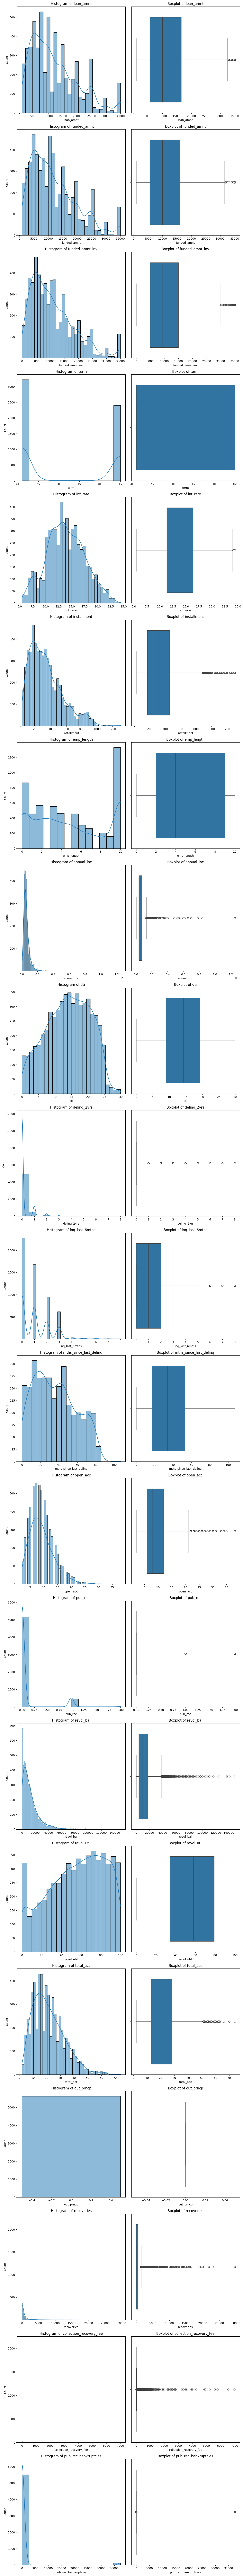

In [129]:
univariate_analysis_numeric(df[df.loan_status == "Charged Off"])

### Observations on univariate segmented numerical analysis.

- Loan Amount: More defaults are happening for loan amount between 5k to 17K, with a mean of 10K. Lets analyse more
- Funded Amount: 5k to 17K 
- Funded Amount Inv: 5k to 17K
- term : default rate is higher 36
- int_rate: 11 to 16%, 13% showing the highest default
- installment : lot of outliers present, default are more between 180 to 420
- emp_length : 0-2 & 10 years more defaulters
- annual_inc : lot of outliers present
- dti : defaulters between 9 to 19 dti
- delinq_2yrs : doesn't show much impact
- mnths_since_last_delinq: delinq_2yrs around 5k records in no delinquency for last 2 years and here we are seeing there is delinquency between 0-20 months as well. Hence delinq data looks incorrect. we can remove them.
- inq_last_6mths: less defaulters if more inquiries, there is a correlation here. Loan given with zero inquiries has highest defaulters.
- open_acc: the chance of default is more if there are credits between 6 to 12
- pub_rec: public derogatory shows no direct impact on defaults, as major default happens with 0 derogatory remarks too
- revol_bal: lot of outliers present.
- revol_util : as the rate increases so does the defaulters, some trend being seen.
- total_acc : more chances of default for credit lines between 11 to 28
- out_prncp : show similar values. can be removed
- recoveris : shows lot of outliers
- collection_recovery_fee : show lot of outliers and looks to be a post charge off formality and can be removed.
- pub_rec_bankruptcies: has no direct impact.


#### Below columns can be removed as no direct impact
- pub_rec_bankruptcies
- pub_rec
- mths_since_last_delinq
- delinq_2yrs
- collection_recovery_fee
- out_prncp

#### Filtering outliers for annual income, based on below analysis

In [130]:
df.annual_inc.quantile([.25,.5,.75,.80,.85,.95,.96,.97,.98,.99, .999, .9999])

0.2500      40000.0
0.5000      58868.0
0.7500      82000.0
0.8000      90000.0
0.8500     100000.0
0.9500     140004.0
0.9600     150000.0
0.9700     165000.0
0.9800     187000.0
0.9900     234144.0
0.9990     700000.0
0.9999    1798803.2
Name: annual_inc, dtype: float64

In [131]:
# We will filter data with .96 percentile 
df = df[(df.annual_inc <= 150000.00)]
df.shape

(37091, 33)

In [132]:
df = df.drop(columns=["pub_rec_bankruptcies", "pub_rec", "mths_since_last_delinq", "delinq_2yrs", "collection_recovery_fee","out_prncp"])
df.shape

(37091, 27)

### Categorical Univariate Analysis
#### Creating bins for doing categorical analysis on continuos data.

In [146]:
#creating bins for int_rate,open_acc,revol_util,total_acc
df['int_rate_groups'] = pd.cut(df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
df['open_acc_groups'] = pd.cut(df['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
df['revol_util_groups'] = pd.cut(df['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
df['total_acc_groups'] = pd.cut(df['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
df['annual_inc_groups'] = pd.cut(df['annual_inc'], bins=6,precision =0,labels =['0k-25k','25k-50k','50k-75k','75k-100k','100k-125k', '125K-150K'])

df['installment_groups'] = pd.cut(df['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
df['funded_amnt_inv_group'] = pd.cut(df['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
df['loan_amnt_groups'] = pd.cut(df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
df['dti_groups'] = pd.cut(df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

In [147]:
category_columns = ['grade', 'home_ownership', 'verification_status',
       'issue_year', 'issue_month', 'loan_status', 'purpose',
       'int_rate_groups',
       'open_acc_groups', 'revol_util_groups', 'total_acc_groups',
       'annual_inc_groups', 'installment_groups','funded_amnt_inv_group', 'loan_amnt_groups','dti_groups']
category_columns

['grade',
 'home_ownership',
 'verification_status',
 'issue_year',
 'issue_month',
 'loan_status',
 'purpose',
 'int_rate_groups',
 'open_acc_groups',
 'revol_util_groups',
 'total_acc_groups',
 'annual_inc_groups',
 'installment_groups',
 'funded_amnt_inv_group',
 'loan_amnt_groups',
 'dti_groups']

In [148]:
df.sub_grade = pd.to_numeric(df.sub_grade.apply(lambda x : x[-1]))
df.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

In [149]:
df.sub_grade = df.sub_grade.astype(str)
df.sub_grade.dtype

dtype('O')

In [159]:
df.int_rate.quantile([.25,.5,.75,.8,.9,.95,.99])
df.int_rate.describe()

count    37091.000000
mean        11.893714
std          3.672804
min          5.420000
25%          8.940000
50%         11.710000
75%         14.300000
max         24.400000
Name: int_rate, dtype: float64

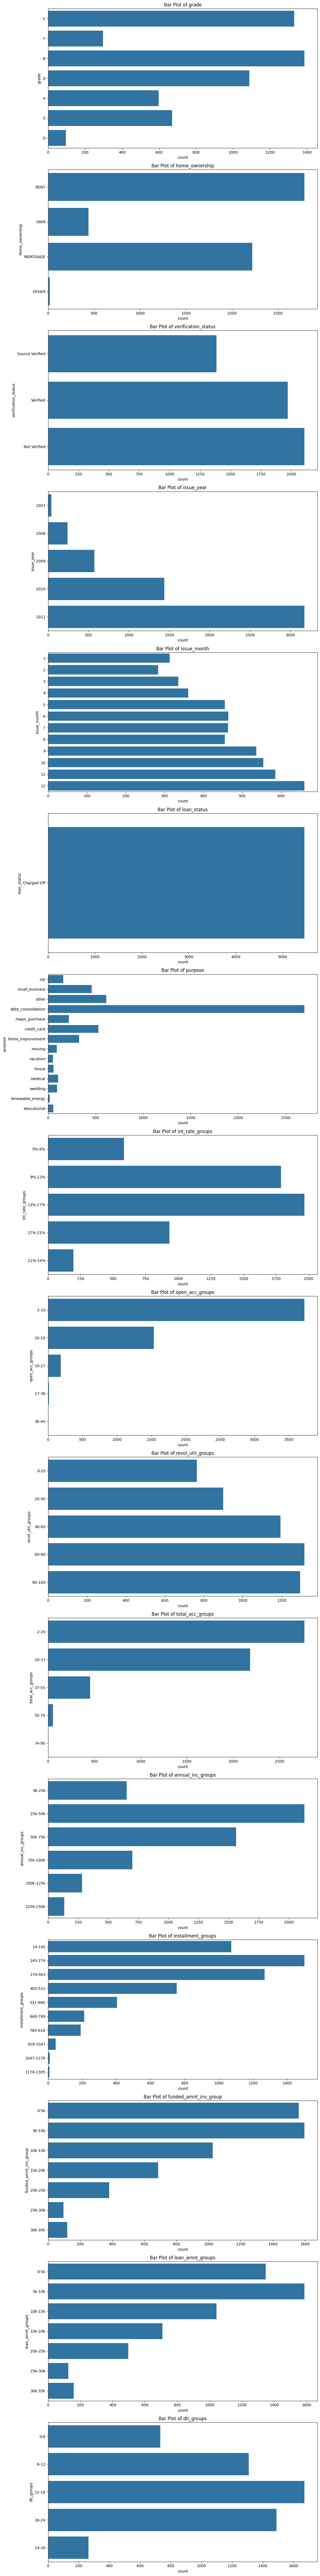

In [150]:
univariate_analysis_categorical(df[df.loan_status == "Charged Off"], category_columns)

### Observations on Segmented Univariate Numerical Analysis


- grade : Major contributers are B, C, D
- sub_grade : TODO: remove or perform correction. B3 and B5 are major contributers, C1, C2 and C3, D2 and D3 are the major contributors
- home_ownership : Rent and Mortgage is having more have more defaulters. Rent is the leading.
- verification_status : verified and not verified has more contribution in defaulters
- purpose : debt_consolidation has the highest defaulting rate.
- zip_code : certain zip code has more defaulters. Need more analysis.
- earliest_credit_line : Need more analysis, as the graph shows some trend on the credit line.
- last_credit_date : shows that for one date the defaulter count is more.
- issue_d: shows the trend that from jan to dec 2011 more defaulters were there and especially the graph for issue_year shows more in 2011.
- TODO: Add missing analysis



## Bivariate Analysis

### Analysing annual income with other columns for more insights 

#### Annual Income vs Loan amount

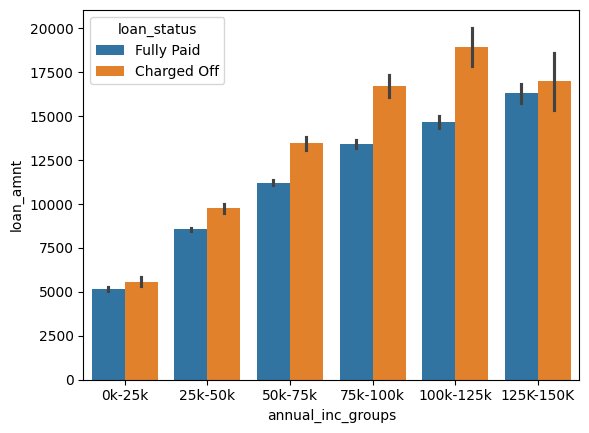

In [151]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = df)
plt.show()

#### Annual Income vs Int rate

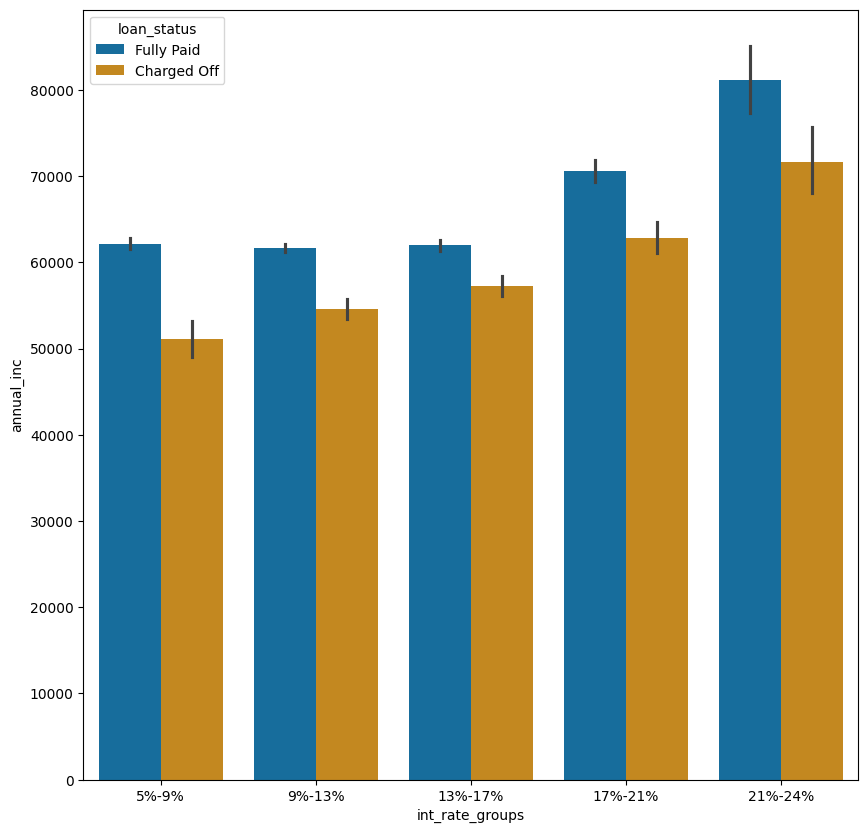

In [152]:
sns.barplot(data =df,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="colorblind")
plt.show()

#### Loan Amount vs Interest Rate

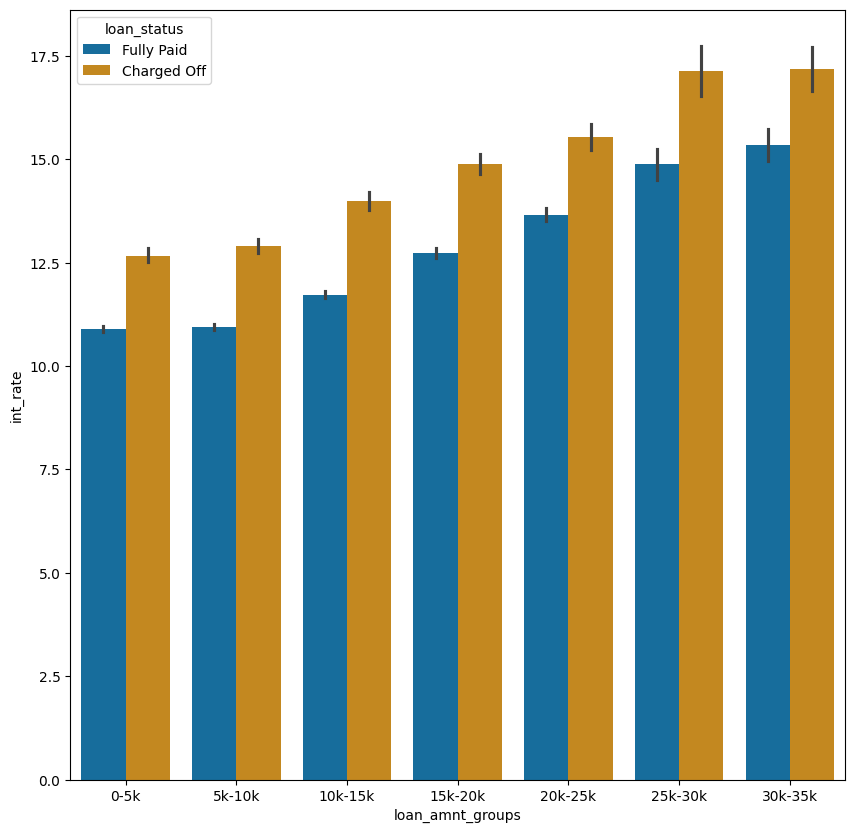

In [153]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data =df,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="colorblind")
plt.show()

#### Annual income vs loan purpose

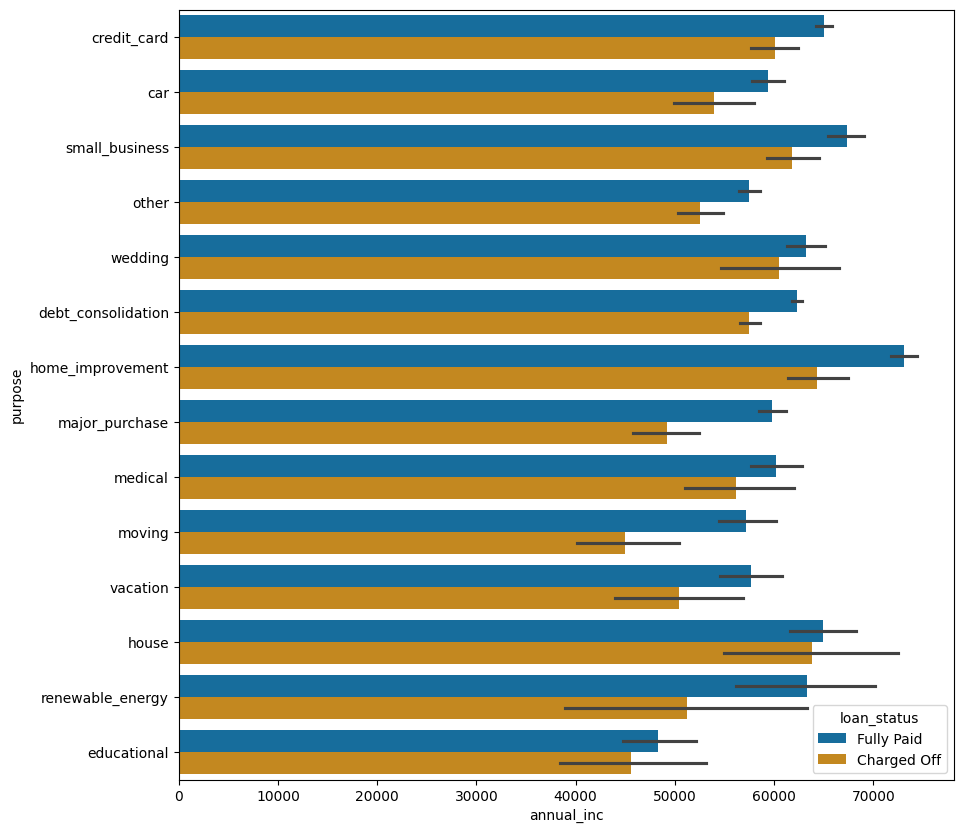

array(['Fully Paid', 'Charged Off'], dtype=object)

In [154]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='annual_inc', y='purpose', hue ='loan_status',palette="colorblind")
plt.show()
df.loan_status.unique()
#observation : default when home_improvement and income between 60-80K

#### Annual income vs home ownership

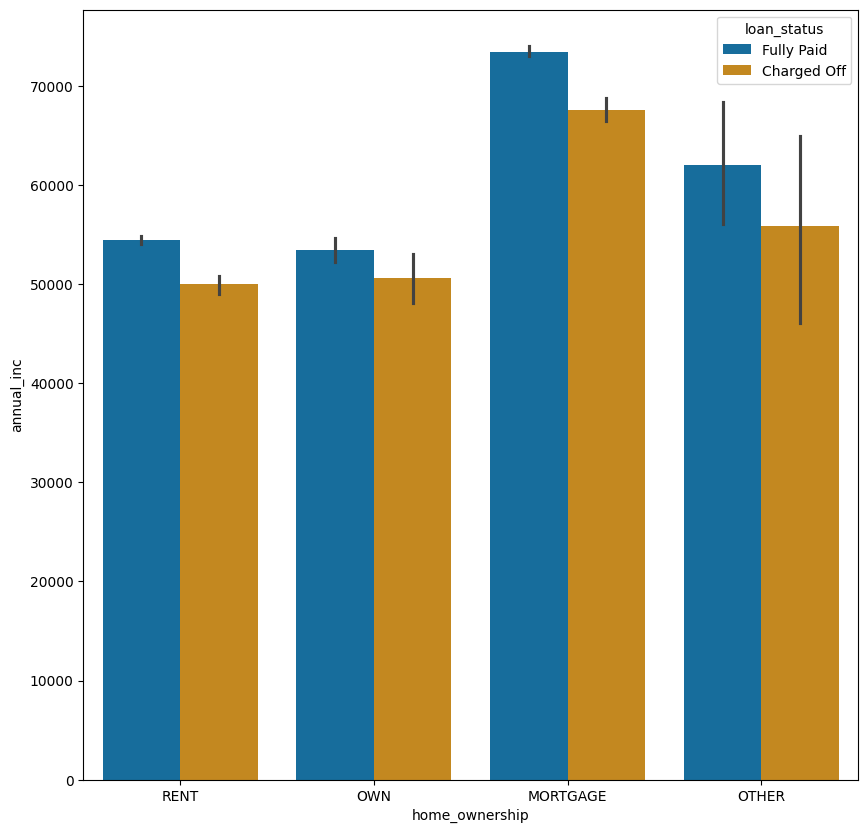

In [155]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='home_ownership', y='annual_inc', hue ='loan_status',palette="colorblind")
plt.show()

### Observations

#### High Charged off or default rates with below combination.
- annual income vs loan_amnt: betwen 30-35K with interest rate between 15 to 17.5 (higher side)
- annual income vs int rate: interest rate between 21-24% and income > 80K. 
- loan amount vs int rate : loan amount between 30-35K and interest rate between 16 to 17.5%
- annual income vs purpose: with home_improvement and annual income between 60 to 80K
- annual income vs home ownership : ownership type Mortgage and income between 70-80K

## Multivariate Analysis

<Axes: >

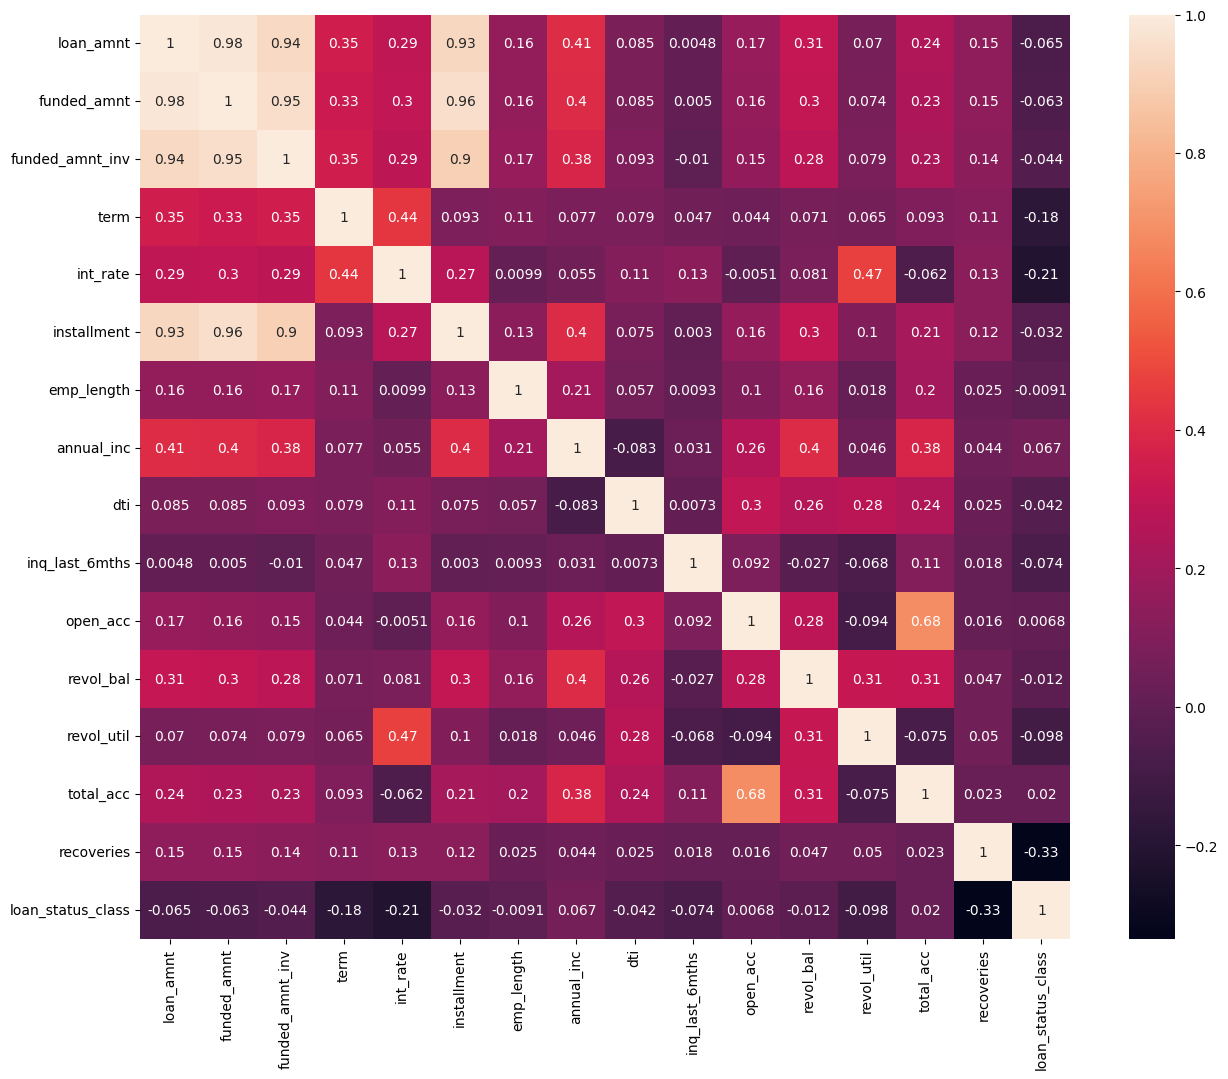

In [181]:
df["loan_status_class"] = df["loan_status"].apply(lambda x : 0 if x == "Charged Off" else 1)
num_columns = df.select_dtypes(include=['float64','int64']).columns
plt.figure(figsize=(15,12))
sns.heatmap(df[num_columns].corr(), annot=True)
#df.loan_status.unique()

#### Oservations on heat map
- columns like term, int_rate, recoveries are negatively correlated with loan status - 18%, 21% & 33% respectively.

In [189]:
#, "int_rate","annual_inc","open_acc","revol_util","total_acc","installment","funded_amnt"
loan_status = df.groupby(by=["loan_status","grade","int_rate_groups","annual_inc_groups", "term", "purpose", "home_ownership","verification_status"])[["loan_amnt"]].count().reset_index()
loan_status = loan_status[(loan_status.loan_status == "Charged Off") ].sort_values(by="loan_amnt",ascending=False)
loan_status.rename(columns={'loan_amnt': 'loan_default_count'}, inplace=True)
loan_status["chargeoff_percentage"] = 100 * (loan_status.loan_default_count/loan_status.loan_default_count.sum())
data = loan_status[loan_status["loan_default_count"] > 0]
    
# with pd.ExcelWriter("output.xlsx", mode='a',if_sheet_exists='replace') as writer:
#     data.to_excel(writer, sheet_name='Sheet1', index=False)
#combinedInfo(data)
#sns.heatmap(data.corr())
data.head(100)

,loan_status,grade,int_rate_groups,annual_inc_groups,term,purpose,home_ownership,verification_status,loan_default_count,chargeoff_percentage
12465,Charged Off,B,9%-13%,25k-50k,36,debt_consolidation,RENT,Not Verified,68,1.244510
24561,Charged Off,C,13%-17%,25k-50k,36,debt_consolidation,RENT,Not Verified,52,0.951684
369,Charged Off,A,5%-9%,25k-50k,36,debt_consolidation,RENT,Not Verified,35,0.640556
12466,Charged Off,B,9%-13%,25k-50k,36,debt_consolidation,RENT,Source Verified,35,0.640556
12456,Charged Off,B,9%-13%,25k-50k,36,debt_consolidation,MORTGAGE,Not Verified,30,0.549048
46907,Charged Off,E,17%-21%,25k-50k,60,debt_consolidation,RENT,Verified,30,0.549048
34641,Charged Off,D,13%-17%,25k-50k,36,debt_consolidation,RENT,Not Verified,29,0.530747
47243,Charged Off,E,17%-21%,50k-75k,60,debt_consolidation,RENT,Verified,28,0.512445
47234,Charged Off,E,17%-21%,50k-75k,60,debt_consolidation,MORTGAGE,Verified,24,0.439239
12962,Charged Off,B,9%-13%,50k-75k,60,debt_consolidation,MORTGAGE,Verified,24,0.439239


In [157]:
df_filtered = df[df.loan_status == "Charged Off"]
correlation = df_filtered[['int_rate', 'loan_amnt']].corr()
print(correlation)

           int_rate  loan_amnt
int_rate   1.000000   0.342129
loan_amnt  0.342129   1.000000


### Conclusion

#### Although in bivariate analysis we have seen observations but if we compare it with Multivariate analysis, we can take intersection of common points

##### Major reasons for loan defaults are as follows
- the term is 36 
- if the grade is B or C
- if the purpose is debt_consolidation 
- home_ownership is RENT or Mortgage
- verification_status is Not Verified
- loan_amount between 5k-10k
- int_rate between 9-17%